<a href="https://colab.research.google.com/github/pandian-raja/EVA4_Session10/blob/master/Session_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install albumentations
!pip install torchsummary
from torchsummary import summary
import numpy as np


In [4]:
!wget https://raw.githubusercontent.com/pandian-raja/EVA4_Session8/master/resnet.py
!wget https://raw.githubusercontent.com/pandian-raja/EVA4_Session9/master/GetData.py

--2020-03-30 05:45:38--  https://raw.githubusercontent.com/pandian-raja/EVA4_Session8/master/resnet.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4005 (3.9K) [text/plain]
Saving to: ‘resnet.py.1’

resnet.py.1         100%[===================>]   3.91K  --.-KB/s    in 0s      

2020-03-30 05:45:38 (109 MB/s) - ‘resnet.py.1’ saved [4005/4005]

--2020-03-30 05:45:39--  https://raw.githubusercontent.com/pandian-raja/EVA4_Session9/master/GetData.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3234 (3.2K) [text/plain]
Saving to: ‘GetData.

In [0]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch

class train_and_validate():
    def train(trainloader, device, model,EPOCH):
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0001)
        for epoch in range(EPOCH):
            running_loss = 0.0
            for i, data in enumerate(trainloader, 0):
                # get the inputs
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)
                # zero the parameter gradients
                optimizer.zero_grad()
                # forward + backward + optimize
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                # print statistics
                running_loss += loss.item()
                if i % 2000 == 1999:    # print every 2000 mini-batches
                    print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
                    running_loss = 0.0

        print('Finished Training')
        return model


    def validate(testloader, device, model):
        dataiter = iter(testloader)
        images, labels = dataiter.next()
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        correct = 0
        total = 0
        with torch.no_grad():
            for data in testloader:
                images, labels = data
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        print('Accuracy of the network on the 10000 test images: %2d %%' % ((100 * correct) / total))    

  
    def classValidation(testloader, device, model, classes):
        class_correct = list(0. for i in range(10))
        class_total = list(0. for i in range(10))
        with torch.no_grad():
            for data in testloader:
                images, labels = data
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                c = (predicted == labels).squeeze()
                for i in range(4):
                    label = labels[i]
                    class_correct[label] += c[i].item()
                    class_total[label] += 1


            for i in range(10):
                print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

In [0]:
import resnet as rs
# import train_and_validate as tv
import GetData as gd

In [7]:
trainloader, testloader, classes, device = gd.GetData.importDataset()

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


In [0]:
model = rs.ResNet18().to(device);


In [9]:
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [10]:
model = train_and_validate.train(trainloader,device,model,4)

[1,  2000] loss: 2.092
[1,  4000] loss: 1.845
[1,  6000] loss: 1.693
[1,  8000] loss: 1.564
[1, 10000] loss: 1.496
[1, 12000] loss: 1.391
[2,  2000] loss: 1.260
[2,  4000] loss: 1.231
[2,  6000] loss: 1.208
[2,  8000] loss: 1.151
[2, 10000] loss: 1.108
[2, 12000] loss: 1.097
[3,  2000] loss: 1.017
[3,  4000] loss: 0.999
[3,  6000] loss: 0.975
[3,  8000] loss: 0.971
[3, 10000] loss: 0.936
[3, 12000] loss: 0.926
[4,  2000] loss: 0.876
[4,  4000] loss: 0.871
[4,  6000] loss: 0.857
[4,  8000] loss: 0.853
[4, 10000] loss: 0.846
[4, 12000] loss: 0.816
Finished Training


In [17]:
model = train_and_validate.train(trainloader,device,model,4)

[1,  2000] loss: 0.768
[1,  4000] loss: 0.803
[1,  6000] loss: 0.756
[1,  8000] loss: 0.759
[1, 10000] loss: 0.739
[1, 12000] loss: 0.744
[2,  2000] loss: 0.718
[2,  4000] loss: 0.687
[2,  6000] loss: 0.699
[2,  8000] loss: 0.687
[2, 10000] loss: 0.675
[2, 12000] loss: 0.685
[3,  2000] loss: 0.646
[3,  4000] loss: 0.640
[3,  6000] loss: 0.643
[3,  8000] loss: 0.642
[3, 10000] loss: 0.625
[3, 12000] loss: 0.638
[4,  2000] loss: 0.577
[4,  4000] loss: 0.589
[4,  6000] loss: 0.602
[4,  8000] loss: 0.582
[4, 10000] loss: 0.583
[4, 12000] loss: 0.590
Finished Training


In [10]:
!wget https://raw.githubusercontent.com/1Konny/gradcam_plus_plus-pytorch/master/utils.py


--2020-03-30 02:22:03--  https://raw.githubusercontent.com/1Konny/gradcam_plus_plus-pytorch/master/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7831 (7.6K) [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]   7.65K  --.-KB/s    in 0s      

2020-03-30 02:22:03 (172 MB/s) - ‘utils.py’ saved [7831/7831]



In [0]:
import cv2
import numpy as np
import torch

def visualize_cam(mask, img):
    """Make heatmap from mask and synthesize GradCAM result image using heatmap and img.
    Args:
        mask (torch.tensor): mask shape of (1, 1, H, W) and each element has value in range [0, 1]
        img (torch.tensor): img shape of (1, 3, H, W) and each pixel value is in range [0, 1]
        
    Return:
        heatmap (torch.tensor): heatmap img shape of (3, H, W)
        result (torch.tensor): synthesized GradCAM result of same shape with heatmap.
    """
    heatmap = cv2.applyColorMap(np.uint8(255 * mask.squeeze().cpu()), cv2.COLORMAP_JET)
    heatmap = torch.from_numpy(heatmap).permute(2, 0, 1).float().div(255)
    b, g, r = heatmap.split(1)
    heatmap = torch.cat([r, g, b])
    
    result = heatmap+img.cpu()
    result = result.div(result.max()).squeeze()
    
    return heatmap, result


def find_resnet_layer(arch, target_layer_name):
    """Find resnet layer to calculate GradCAM and GradCAM++
    
    Args:
        arch: default torchvision densenet models
        target_layer_name (str): the name of layer with its hierarchical information. please refer to usages below.
            target_layer_name = 'conv1'
            target_layer_name = 'layer1'
            target_layer_name = 'layer1_basicblock0'
            target_layer_name = 'layer1_basicblock0_relu'
            target_layer_name = 'layer1_bottleneck0'
            target_layer_name = 'layer1_bottleneck0_conv1'
            target_layer_name = 'layer1_bottleneck0_downsample'
            target_layer_name = 'layer1_bottleneck0_downsample_0'
            target_layer_name = 'avgpool'
            target_layer_name = 'fc'
            
    Return:
        target_layer: found layer. this layer will be hooked to get forward/backward pass information.
    """
    if 'layer' in target_layer_name:
        hierarchy = target_layer_name.split('_')
        layer_num = int(hierarchy[0].lstrip('layer'))
        if layer_num == 1:
            target_layer = arch.layer1
        elif layer_num == 2:
            target_layer = arch.layer2
        elif layer_num == 3:
            target_layer = arch.layer3
        elif layer_num == 4:
            target_layer = arch.layer4
        else:
            raise ValueError('unknown layer : {}'.format(target_layer_name))

        if len(hierarchy) >= 2:
            bottleneck_num = int(hierarchy[1].lower().lstrip('bottleneck').lstrip('basicblock'))
            target_layer = target_layer[bottleneck_num]

        if len(hierarchy) >= 3:
            target_layer = target_layer._modules[hierarchy[2]]
                
        if len(hierarchy) == 4:
            target_layer = target_layer._modules[hierarchy[3]]

    else:
        target_layer = arch._modules[target_layer_name]

    return target_layer


def find_densenet_layer(arch, target_layer_name):
    """Find densenet layer to calculate GradCAM and GradCAM++
    
    Args:
        arch: default torchvision densenet models
        target_layer_name (str): the name of layer with its hierarchical information. please refer to usages below.
            target_layer_name = 'features'
            target_layer_name = 'features_transition1'
            target_layer_name = 'features_transition1_norm'
            target_layer_name = 'features_denseblock2_denselayer12'
            target_layer_name = 'features_denseblock2_denselayer12_norm1'
            target_layer_name = 'features_denseblock2_denselayer12_norm1'
            target_layer_name = 'classifier'
            
    Return:
        target_layer: found layer. this layer will be hooked to get forward/backward pass information.
    """
    
    hierarchy = target_layer_name.split('_')
    target_layer = arch._modules[hierarchy[0]]

    if len(hierarchy) >= 2:
        target_layer = target_layer._modules[hierarchy[1]]

    if len(hierarchy) >= 3:
        target_layer = target_layer._modules[hierarchy[2]]

    if len(hierarchy) == 4:
        target_layer = target_layer._modules[hierarchy[3]]

    return target_layer


def find_vgg_layer(arch, target_layer_name):
    """Find vgg layer to calculate GradCAM and GradCAM++
    
    Args:
        arch: default torchvision densenet models
        target_layer_name (str): the name of layer with its hierarchical information. please refer to usages below.
            target_layer_name = 'features'
            target_layer_name = 'features_42'
            target_layer_name = 'classifier'
            target_layer_name = 'classifier_0'
            
    Return:
        target_layer: found layer. this layer will be hooked to get forward/backward pass information.
    """
    hierarchy = target_layer_name.split('_')

    if len(hierarchy) >= 1:
        target_layer = arch.features

    if len(hierarchy) == 2:
        target_layer = target_layer[int(hierarchy[1])]

    return target_layer


def find_alexnet_layer(arch, target_layer_name):
    """Find alexnet layer to calculate GradCAM and GradCAM++
    
    Args:
        arch: default torchvision densenet models
        target_layer_name (str): the name of layer with its hierarchical information. please refer to usages below.
            target_layer_name = 'features'
            target_layer_name = 'features_0'
            target_layer_name = 'classifier'
            target_layer_name = 'classifier_0'
            
    Return:
        target_layer: found layer. this layer will be hooked to get forward/backward pass information.
    """
    hierarchy = target_layer_name.split('_')

    if len(hierarchy) >= 1:
        target_layer = arch.features

    if len(hierarchy) == 2:
        target_layer = target_layer[int(hierarchy[1])]

    return target_layer


def find_squeezenet_layer(arch, target_layer_name):
    """Find squeezenet layer to calculate GradCAM and GradCAM++
    
    Args:
        arch: default torchvision densenet models
        target_layer_name (str): the name of layer with its hierarchical information. please refer to usages below.
            target_layer_name = 'features_12'
            target_layer_name = 'features_12_expand3x3'
            target_layer_name = 'features_12_expand3x3_activation'
            
    Return:
        target_layer: found layer. this layer will be hooked to get forward/backward pass information.
    """
    hierarchy = target_layer_name.split('_')
    target_layer = arch._modules[hierarchy[0]]

    if len(hierarchy) >= 2:
        target_layer = target_layer._modules[hierarchy[1]]

    if len(hierarchy) == 3:
        target_layer = target_layer._modules[hierarchy[2]]

    elif len(hierarchy) == 4:
        target_layer = target_layer._modules[hierarchy[2]+'_'+hierarchy[3]]

    return target_layer


def denormalize(tensor, mean, std):
    if not tensor.ndimension() == 4:
        raise TypeError('tensor should be 4D')

    mean = torch.FloatTensor(mean).view(1, 3, 1, 1).expand_as(tensor).to(tensor.device)
    std = torch.FloatTensor(std).view(1, 3, 1, 1).expand_as(tensor).to(tensor.device)

    return tensor.mul(std).add(mean)


def normalize(tensor, mean, std):
    if not tensor.ndimension() == 4:
        raise TypeError('tensor should be 4D')

    mean = torch.FloatTensor(mean).view(1, 3, 1, 1).expand_as(tensor).to(tensor.device)
    std = torch.FloatTensor(std).view(1, 3, 1, 1).expand_as(tensor).to(tensor.device)

    return tensor.sub(mean).div(std)


class Normalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        return self.do(tensor)
    
    def do(self, tensor):
        return normalize(tensor, self.mean, self.std)
    
    def undo(self, tensor):
        return denormalize(tensor, self.mean, self.std)

    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

In [0]:
import torch
import torch.nn.functional as F

from utils import find_alexnet_layer, find_vgg_layer, find_resnet_layer, find_densenet_layer, find_squeezenet_layer


class GradCAM(object):
    """Calculate GradCAM salinecy map.

    A simple example:

        # initialize a model, model_dict and gradcam
        resnet = torchvision.models.resnet101(pretrained=True)
        resnet.eval()
        model_dict = dict(model_type='resnet', arch=resnet, layer_name='layer4', input_size=(224, 224))
        gradcam = GradCAM(model_dict)

        # get an image and normalize with mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)
        img = load_img()
        normed_img = normalizer(img)

        # get a GradCAM saliency map on the class index 10.
        mask, logit = gradcam(normed_img, class_idx=10)

        # make heatmap from mask and synthesize saliency map using heatmap and img
        heatmap, cam_result = visualize_cam(mask, img)


    Args:
        model_dict (dict): a dictionary that contains 'model_type', 'arch', layer_name', 'input_size'(optional) as keys.
        verbose (bool): whether to print output size of the saliency map givien 'layer_name' and 'input_size' in model_dict.
    """
    def __init__(self, model_dict, verbose=False):
        model_type = model_dict['type']
        layer_name = model_dict['layer_name']
        self.model_arch = model_dict['arch']

        self.gradients = dict()
        self.activations = dict()
        def backward_hook(module, grad_input, grad_output):
            self.gradients['value'] = grad_output[0]
            return None
        def forward_hook(module, input, output):
            self.activations['value'] = output
            return None

        if 'vgg' in model_type.lower():
            target_layer = find_vgg_layer(self.model_arch, layer_name)
        elif 'resnet' in model_type.lower():
            target_layer = find_resnet_layer(self.model_arch, layer_name)
        elif 'densenet' in model_type.lower():
            target_layer = find_densenet_layer(self.model_arch, layer_name)
        elif 'alexnet' in model_type.lower():
            target_layer = find_alexnet_layer(self.model_arch, layer_name)
        elif 'squeezenet' in model_type.lower():
            target_layer = find_squeezenet_layer(self.model_arch, layer_name)

        target_layer.register_forward_hook(forward_hook)
        target_layer.register_backward_hook(backward_hook)

        if verbose:
            try:
                input_size = model_dict['input_size']
            except KeyError:
                print("please specify size of input image in model_dict. e.g. {'input_size':(224, 224)}")
                pass
            else:
                device = 'cuda' if next(self.model_arch.parameters()).is_cuda else 'cpu'
                self.model_arch(torch.zeros(1, 3, *(input_size), device=device))
                print('saliency_map size :', self.activations['value'].shape[2:])


    def forward(self, input, class_idx=None, retain_graph=False):
        """
        Args:
            input: input image with shape of (1, 3, H, W)
            class_idx (int): class index for calculating GradCAM.
                    If not specified, the class index that makes the highest model prediction score will be used.
        Return:
            mask: saliency map of the same spatial dimension with input
            logit: model output
        """
        b, c, h, w = input.size()

        logit = self.model_arch(input)
        if class_idx is None:
            score = logit[:, logit.max(1)[-1]].squeeze()
        else:
            score = logit[:, class_idx].squeeze()

        self.model_arch.zero_grad()
        score.backward(retain_graph=retain_graph)
        gradients = self.gradients['value']
        activations = self.activations['value']
        b, k, u, v = gradients.size()

        alpha = gradients.view(b, k, -1).mean(2)
        #alpha = F.relu(gradients.view(b, k, -1)).mean(2)
        weights = alpha.view(b, k, 1, 1)

        saliency_map = (weights*activations).sum(1, keepdim=True)
        saliency_map = F.relu(saliency_map)
        saliency_map = F.upsample(saliency_map, size=(h, w), mode='bilinear', align_corners=False)
        saliency_map_min, saliency_map_max = saliency_map.min(), saliency_map.max()
        saliency_map = (saliency_map - saliency_map_min).div(saliency_map_max - saliency_map_min).data

        return saliency_map, logit

    def __call__(self, input, class_idx=None, retain_graph=False):
        return self.forward(input, class_idx, retain_graph)


class GradCAMpp(GradCAM):
    """Calculate GradCAM++ salinecy map.

    A simple example:

        # initialize a model, model_dict and gradcampp
        resnet = torchvision.models.resnet101(pretrained=True)
        resnet.eval()
        model_dict = dict(model_type='resnet', arch=resnet, layer_name='layer4', input_size=(224, 224))
        gradcampp = GradCAMpp(model_dict)

        # get an image and normalize with mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)
        img = load_img()
        normed_img = normalizer(img)

        # get a GradCAM saliency map on the class index 10.
        mask, logit = gradcampp(normed_img, class_idx=10)

        # make heatmap from mask and synthesize saliency map using heatmap and img
        heatmap, cam_result = visualize_cam(mask, img)


    Args:
        model_dict (dict): a dictionary that contains 'model_type', 'arch', layer_name', 'input_size'(optional) as keys.
        verbose (bool): whether to print output size of the saliency map givien 'layer_name' and 'input_size' in model_dict.
    """
    def __init__(self, model_dict, verbose=False):
        super(GradCAMpp, self).__init__(model_dict, verbose)

    def forward(self, input, class_idx=None, retain_graph=False):
        """
        Args:
            input: input image with shape of (1, 3, H, W)
            class_idx (int): class index for calculating GradCAM.
                    If not specified, the class index that makes the highest model prediction score will be used.
        Return:
            mask: saliency map of the same spatial dimension with input
            logit: model output
        """
        b, c, h, w = input.size()

        logit = self.model_arch(input)
        if class_idx is None:
            score = logit[:, logit.max(1)[-1]].squeeze()
        else:
            score = logit[:, class_idx].squeeze() 
            
        self.model_arch.zero_grad()
        score.backward(retain_graph=retain_graph)
        gradients = self.gradients['value'] # dS/dA
        activations = self.activations['value'] # A
        b, k, u, v = gradients.size()

        alpha_num = gradients.pow(2)
        alpha_denom = gradients.pow(2).mul(2) + \
                activations.mul(gradients.pow(3)).view(b, k, u*v).sum(-1, keepdim=True).view(b, k, 1, 1)
        alpha_denom = torch.where(alpha_denom != 0.0, alpha_denom, torch.ones_like(alpha_denom))

        alpha = alpha_num.div(alpha_denom+1e-7)
        positive_gradients = F.relu(score.exp()*gradients) # ReLU(dY/dA) == ReLU(exp(S)*dS/dA))
        weights = (alpha*positive_gradients).view(b, k, u*v).sum(-1).view(b, k, 1, 1)

        saliency_map = (weights*activations).sum(1, keepdim=True)
        saliency_map = F.relu(saliency_map)
        saliency_map = F.upsample(saliency_map, size=(32, 32), mode='bilinear', align_corners=False)
        saliency_map_min, saliency_map_max = saliency_map.min(), saliency_map.max()
        saliency_map = (saliency_map-saliency_map_min).div(saliency_map_max-saliency_map_min).data

        return saliency_map, logit

In [0]:
from utils import visualize_cam, Normalize

In [0]:
def test(dataloader):
    running_corrects = 0
    running_loss=0
    pred = []
    true = []
    pred_wrong = []
    true_wrong = []
    image = []
    sm = nn.Softmax(dim = 1)
    for batch_idx, (data, target) in enumerate(dataloader):
        data, target = Variable(data), Variable(target)
        data = data.type(torch.cuda.FloatTensor)
        target = target.type(torch.cuda.LongTensor)
        model.eval()
        output = model(data)
        loss = criterion(output, target)
        output = sm(output)
        _, preds = torch.max(output, 1)
        running_corrects = running_corrects + torch.sum(preds == target.data)
        running_loss += loss.item() * data.size(0)
        preds = preds.cpu().numpy()
        target = target.cpu().numpy()
        preds = np.reshape(preds,(len(preds),1))
        target = np.reshape(target,(len(preds),1))
        data = data.cpu().numpy()
        
        for i in range(len(preds)):
            pred.append(preds[i])
            true.append(target[i])
            if(preds[i]!=target[i]):
                pred_wrong.append(preds[i])
                true_wrong.append(target[i])
                image.append(data[i])
      
    epoch_acc = running_corrects.double()/(len(dataloader)*4)
    epoch_loss = running_loss/(len(dataloader)*4)
    print(epoch_acc,epoch_loss)
    return true,pred,image,true_wrong,pred_wrong

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import random
criterion= nn.CrossEntropyLoss().to(device)

# true,pred,image,true_wrong,pred_wrong = test(testloader)


In [0]:
import cv2


In [0]:
def wrong_plot2(true,ima,pred,encoder,inv_normalize,n_figures ):
    print('Classes in order Actual and Predicted')
    n_row = int(n_figures/5)
    fig,axes = plt.subplots(figsize=(15, 15), nrows = n_row, ncols=5)
    print(axes)
    for ax in axes.flatten():
        a = random.randint(0,len(true)-1)
        image,correct,wrong = ima[a],true[a],pred[a]
        # image = image.cuda()
        # image = image.cpu()
        # image = image.numpy()
        # # correct = int(correct)
        # c = encoder[correct]
        # wrong = int(wrong)
        # w = encoder[wrong]
        # f = 'A:'+str(c.item()) + ',' +'P:'+str(w.item())
        # f = 'A:'+str(correct[0]) + ',' +'P:'+str(wrong[0])
        f = 'A:'+classes[correct[0]] + ',' +'P:'+classes[wrong[0]]
        # image = image.numpy().transpose(1,2,0)
        # image = image.squeeze()
        # im = ax.imshow(cv2.cvtColor(torchvision.utils.make_grid(image[0].cpu(), nrow=5).permute(1, 2, 0), cv2.COLOR_BGR2RGB))
        ax.imshow(torchvision.utils.make_grid(image.cpu(), nrow=5).permute(1, 2, 0), cmap='brg', interpolation='none')
        ax.set_title(f)
        ax.axis('off')
    plt.show()

Classes in order Actual and Predicted


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05c0b61080>


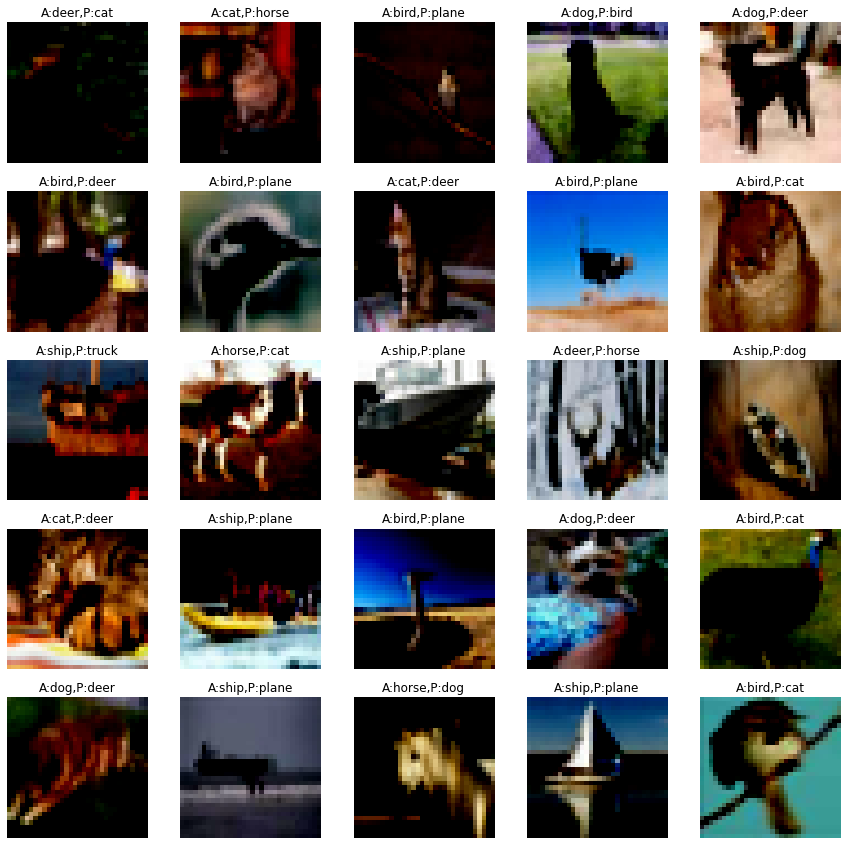

In [129]:

wrong_plot2(true_wrong,image,pred_wrong,testloader.dataset.targets,None,25)


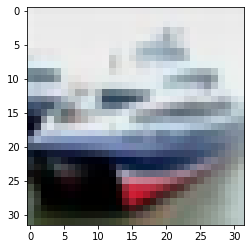

In [120]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

imshow(torchvision.utils.make_grid(image[0].cpu(), nrow=5))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


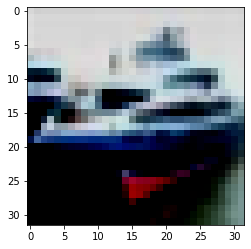

In [93]:
import torch
import torchvision
# out = torchvision.utils.make_grid(inputs)
# plt.imshow(out)
plt.imshow(torchvision.utils.make_grid(image[0].cpu(), nrow=5).permute(1, 2, 0))

In [92]:
torchvision.utils.make_grid(image[0].cpu(), nrow=5).permute(1, 2, 0)

tensor([[[ 0.8431,  0.8431,  0.8431],
         [ 0.8118,  0.8118,  0.8118],
         [ 0.8196,  0.8196,  0.8196],
         ...,
         [ 0.8275,  0.8275,  0.8275],
         [ 0.8275,  0.8275,  0.8275],
         [ 0.8196,  0.8196,  0.8196]],

        [[ 0.8667,  0.8667,  0.8667],
         [ 0.8431,  0.8431,  0.8431],
         [ 0.8431,  0.8431,  0.8431],
         ...,
         [ 0.8510,  0.8510,  0.8510],
         [ 0.8510,  0.8510,  0.8510],
         [ 0.8431,  0.8431,  0.8431]],

        [[ 0.8588,  0.8588,  0.8588],
         [ 0.8353,  0.8353,  0.8353],
         [ 0.8353,  0.8353,  0.8353],
         ...,
         [ 0.8431,  0.8431,  0.8431],
         [ 0.8431,  0.8431,  0.8431],
         [ 0.8353,  0.8353,  0.8353]],

        ...,

        [[-0.3176, -0.2235, -0.3020],
         [-0.6627, -0.6000, -0.7098],
         [-0.8510, -0.8196, -0.9137],
         ...,
         [ 0.3255,  0.4431,  0.4039],
         [ 0.4275,  0.5451,  0.5137],
         [ 0.4745,  0.5843,  0.5765]],

        [[

In [0]:
def wrong_plot2(true,ima,pred,encoder,inv_normalize,n_figures ):
    print('Classes in order Actual and Predicted')
    n_row = int(n_figures/5)
    fig,axes = plt.subplots(figsize=(10, 10), nrows = n_row, ncols=5)
    for ax in axes.flatten():
        a = random.randint(0,len(true)-1)
    
        image,correct,wrong = ima[a],true[a],pred[a]
        image = to(image)
        correct = int(correct)
        c = encoder[correct]
        wrong = int(wrong)
        w = encoder[wrong]
        f = 'A:'+str(c.item()) + ',' +'P:'+str(w.item())
        f = 'A:'+str(correct) + ',' +'P:'+str(wrong)
        # image = image.numpy().transpose(1,2,0)
        image = image.squeeze()
        im = ax.imshow(image, cmap='gray', interpolation='none')
        ax.set_title(f)
        ax.axis('off')
    plt.show()


NameError: ignored

In [0]:
def validate(testloader, device, model):
        pred_wrong = []
        true_wrong = []
        image = []
        dataiter = iter(testloader)
        images, labels = dataiter.next()
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        correct = 0
        total = 0
        with torch.no_grad():
            for data in testloader:
                images, labels = data
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                # print(predicted)
                # print(labels)
                preds = predicted.cpu().numpy()
                target = labels.cpu().numpy()
                preds = np.reshape(preds,(len(preds),1))
                target = np.reshape(target,(len(preds),1))
                for i in range(len(preds)):
                    # pred.append(preds[i])
                    # true.append(target[i])
                    if(preds[i]!=target[i]):
                        pred_wrong.append(preds[i])
                        true_wrong.append(target[i])
                        image.append(images[i])
                # if(predicted != labels):
                #     pred_wrong.append(predicted)
                #     true_wrong.append(labels)
                #     image.append(data[i])
        print('Accuracy of the network on the 10000 test images: %2d %%' % ((100 * correct) / total))
        return image,true_wrong,pred_wrong


In [14]:
image,true_wrong,pred_wrong = validate(testloader,device,model)

Accuracy of the network on the 10000 test images: 72 %


In [0]:
model.eval(), model.cuda();
normalizer = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
torch_img = torch.from_numpy(np.asarray(testset[0])).permute(2, 0, 1).unsqueeze(0).float().div(255).cpu().cuda()
torch_img = F.upsample(torch_img, size=(32, 32), mode='bilinear', align_corners=False)
normed_torch_img = normalizer(torch_img)

ValueError: ignored

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt


In [0]:
cam_dict = dict()
resnet_model_dict = dict(type='resnet', arch=model, layer_name='layer4', input_size=(32, 32))
resnet_gradcam = GradCAM(resnet_model_dict, True)
resnet_gradcampp = GradCAMpp(resnet_model_dict, True)
cam_dict['resnet'] = [resnet_gradcam, resnet_gradcampp]


saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])


In [0]:
mask, _ = gradcam(normed_torch_img)
heatmap, result = visualize_cam(mask, torch_img)


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


In [0]:
from albumentations import Compose, RandomCrop, Normalize, HorizontalFlip, Cutout, VerticalFlip
from albumentations.pytorch import ToTensor
class albumCompose_test:
    def __init__(self):
        self.albumentations_transform = Compose({
        Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        })
    def __call__(self, img):
        img = np.array(img)
        img = self.albumentations_transform(image=img)['image']
        img = np.transpose(img, (2, 0, 1)).astype(np.float32)
        return torch.tensor(img, dtype=torch.float)
        
        
normalizer = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
torch_img = torch.from_numpy(np.asarray(testset[0])).permute(2, 0, 1).unsqueeze(0).float().div(255).cpu().cuda()
torch_img = F.upsample(torch_img, size=(32, 32), mode='bilinear', align_corners=False)



In [0]:
def wrong_plot(true,ima,pred,encoder,inv_normalize,n_figures ):
    print('Classes in order Actual and Predicted')
    n_row = int(n_figures/5)
    fig,axes = plt.subplots(figsize=(10, 10), nrows = n_row, ncols=5)
    for ax in axes.flatten():
        a = random.randint(0,len(true)-1)
    
        image,correct,wrong = ima[a],true[a],pred[a]
        image = torch.from_numpy(image)
        correct = int(correct)
        c = encoder[correct]
        wrong = int(wrong)
        w = encoder[wrong]
        f = 'A:'+str(c.item()) + ',' +'P:'+str(w.item())
        f = 'A:'+str(correct) + ',' +'P:'+str(wrong)
        # image = image.numpy().transpose(1,2,0)
        image = image.squeeze()
        im = ax.imshow(image, cmap='gray', interpolation='none')
        ax.set_title(f)
        ax.axis('off')
    plt.show()

In [16]:
import torchvision

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
        download=True, transform=albumCompose_test())
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                             shuffle=False, num_workers=2)


Files already downloaded and verified


In [0]:
import PIL
import numpy as np
import torch
import torch.nn.functional as F
import torchvision.models as models
from torchvision.utils import make_grid, save_image
img_name = 'water-bird.JPEG'
# img_path = os.path.join(img_dir, img_name)

pil_img = PIL.Image.open(img_name)


In [0]:
images = []
for gradcam, gradcam_pp in cam_dict.values():
    mask, _ = gradcam(normed_torch_img)
    heatmap, result = visualize_cam(mask, torch_img)

    mask_pp, _ = gradcam_pp(normed_torch_img)
    heatmap_pp, result_pp = visualize_cam(mask_pp, torch_img)
    
    images.append(torch.stack([torch_img.squeeze().cpu(), heatmap, heatmap_pp, result, result_pp], 0))
   

AttributeError: ignored

In [0]:
con = torch.cat((a, b), 1)


In [0]:
images = make_grid(torch.cat(images, 0), nrow=5)

In [0]:
import torch as t
from torchvision.transforms import ToPILImage
from IPython.display import Image
to_img = ToPILImage()


In [0]:
to_img(images)

# display imagefile
Image('/path/to/my.png')


In [0]:
output_dir = 'outputs'
os.makedirs(output_dir, exist_ok=True)
output_name = img_name
output_path = os.path.join(output_dir, output_name)

save_image(images, output_path)
PIL.Image.open(output_path)

NameError: ignored

In [0]:
import os
